# 0. IMPORTS

## 0.1. Importing libraries

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inflection

## 0.2. Loading data

In [ ]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
df = pd.read_json(url)

## 0.3. Dicionário de dados

Nome | Descrição
--|--
customerID | número de identificação único de cada cliente
Churn | se o cliente deixou ou não a empresa 
gender | gênero (masculino e feminino) 
SeniorCitizen | informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
Partner |  se o cliente possui ou não um parceiro ou parceira
Dependents | se o cliente possui ou não dependentes
tenure |  meses de contrato do cliente
PhoneService | assinatura de serviço telefônico 
MultipleLines | assisnatura de mais de uma linha de telefone 
InternetService | assinatura de um provedor internet 
OnlineSecurity | assinatura adicional de segurança online 
OnlineBackup | assinatura adicional de backup online 
DeviceProtection | assinatura adicional de proteção no dispositivo 
TechSupport | assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV | assinatura de TV a cabo 
StreamingMovies | assinatura de streaming de filmes 
Contract | tipo de contrato
PaperlessBilling | se o cliente prefere receber online a fatura
PaymentMethod | forma de pagamento
Charges.Monthly | total de todos os serviços do cliente por mês
Charges.Total | total gasto pelo cliente

## 0.3. Helper functions

In [213]:
def rename_columns(cols):
    cols = list(map(lambda x: inflection.titleize(x), cols))
    cols = list(map(lambda x: x.replace(" ", ""), cols))
    cols = list(map(lambda x: x.replace(".", ""), cols))
    cols = list(map(lambda x: inflection.underscore(x), cols))
    return cols

def fill_nas(df, col, text):
    df_aux = df[col]. map({'Yes': 'Yes', 'No': 'No', text: 'No'})
    return df_aux

def convert_and_replace(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return 0.0
    
def grafics_num_attribute(df, col):

    # Calcular a média e a mediana
    mean_value = np.mean(df[col])
    median_value = np.median(df[col])
    std_low = mean_value - np.std(df[col])
    std_high = mean_value + np.std(df[col])

    # Criação dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    # Plotagem do histograma no primeiro subplot
    ax1.hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    ax1.axvline(mean_value, color='red', linewidth=1, label='Média')
    ax1.axvline(median_value, color='blue', linewidth=1, label='Mediana')
    ax1.axvline(std_low, color='red', linestyle='dashed', linewidth=1, label='Low std')
    ax1.axvline(std_high, color='red', linestyle='dashed', linewidth=1, label='High std')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequência')
    ax1.set_title(f'Histograma de {col} com Média e Mediana')
    ax1.legend()

    # Plotagem do boxplot no segundo subplot
    ax2.boxplot(df[col], vert=False)
    ax2.set_xlabel(col)
    ax2.set_title(f'Boxplot de {col}')

# 1. PASSO 01 - DATA DESCRIPTION

In [87]:
df1 = df.copy()

## 1.1. Normalize Columns

In [88]:
# Normalizar colunas com dicionários aninhados
columns_to_normalize = ['customer', 'phone', 'internet', 'account']
for col in columns_to_normalize:
    df1 = pd.concat([df1.drop([col], axis=1), pd.json_normalize(df1[col])], axis=1)
df1.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.2. Rename Columns

In [89]:
df1.columns = rename_columns(df1.columns)
df1.head()

,customer,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.3. Data Dimensions

In [90]:
print('Quantidade de linha: {:,}'.format(df1.shape[0]))
print('Quantidade de colunas: {:,}'.format(df1.shape[1]))

Quantidade de linha: 7,267
Quantidade de colunas: 21


## 1.4. Data Types

In [91]:
df1.dtypes

customer              object
churn                 object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
charges_monthly      float64
charges_total         object
dtype: object

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

## 1.5. Check NA's

In [104]:
df1.isna().sum()

customer             0
churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
charges_monthly      0
charges_total        0
dtype: int64

In [106]:
df1['charges_total'].astype(float)

ValueError: could not convert string to float: ''

In [93]:
# Nota-se que existem Na's na terceira opção de algumas features de 'Yes' ou 'No' e charges_total que possui ''
unicos = pd.DataFrame(df1.nunique())
unicos.columns= ['count']
unicos['content'] = df1.apply(lambda x: x.unique())
unicos

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[0, 1]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,73,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,3,"[No, Yes, No phone service]"
internet_service,3,"[DSL, Fiber optic, No]"


## 1.6. Fillout NA's

In [113]:
df2 = df1.copy()

In [116]:
df2['multiple_lines'] = fill_nas(df2, 'multiple_lines', 'No phone service')
df2['online_security'] = fill_nas(df2, 'online_security', 'No internet service')
df2['online_backup'] = fill_nas(df2, 'online_backup', 'No internet service')
df2['device_protection'] = fill_nas(df2, 'device_protection', 'No internet service')
df2['tech_support'] = fill_nas(df2, 'tech_support', 'No internet service')
df2['streaming_tv'] = fill_nas(df2, 'streaming_tv', 'No internet service')
df2['streaming_movies'] = fill_nas(df2, 'streaming_movies', 'No internet service')

In [158]:
unicos = pd.DataFrame(df2.nunique())
unicos.columns= ['count']
unicos['content'] = df2.apply(lambda x: x.unique())
unicos

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[No, Yes]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,73,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,2,"[No, Yes]"
internet_service,3,"[DSL, Fiber optic, No]"


## 1.7. Change Data Types

In [133]:
# Converter charges_total para float
df2['charges_total'] = df2['charges_total'].apply(convert_and_replace)

In [157]:
# Converter senior_citizen em categórico ('Yes', 'No')
df2['senior_citizen'] = df2['senior_citizen'].map({0: 'No', 1: 'Yes'})

In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

## 1.8. Descriptive Statics

In [159]:
# Separar os tipos de dados categóricos dos numéricos
num = df2.select_dtypes(include = ['int64', 'int32', 'float64'])
cat = df2.select_dtypes(exclude = ['int64', 'int32', 'float64'])

### 1.7.1. Numerical attributes

In [160]:
# Incluir: Range, kurtosis, skew e std 
num_describe = num.describe().T
num_describe['range'] = pd.DataFrame(num.apply(lambda x: x.max() - x.min()))
num_describe['skew'] = pd.DataFrame(num.apply(lambda x: x.skew()))
num_describe['kurtosis'] = pd.DataFrame(num.apply(lambda x: x.kurtosis()))
num_describe

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00,72.0,0.239523,-1.388981
charges_monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75,100.5,-0.216539,-1.261512
charges_total,7267.0,2277.182035,2268.648587,0.00,396.200,1389.2,3778.525,8684.80,8684.8,0.965766,-0.227330


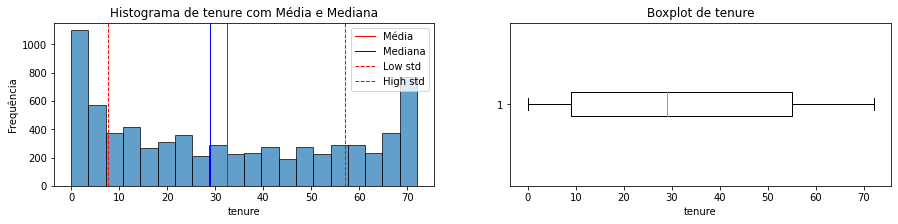

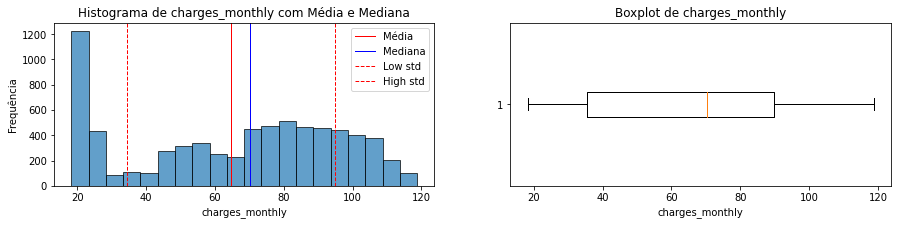

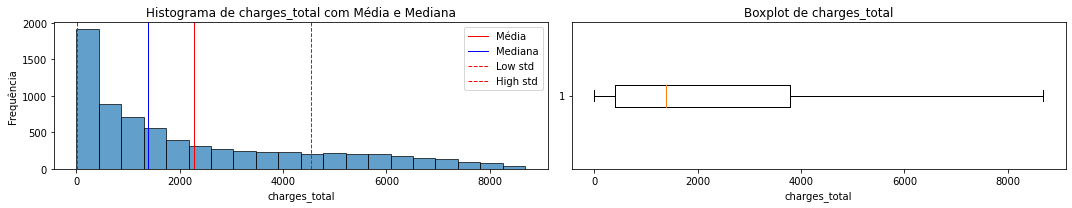

In [214]:
# Chamar a função para cada atributo e posicionar os gráficos dentro da figura principal
for i, col in enumerate(['tenure', 'charges_monthly', 'charges_total']):
    ax = fig.add_subplot(1, 3, i+1)
    grafics_num_attribute(num, col)

# Exibir a figura principal com todos os subplots
plt.tight_layout()
plt.show()

### 1.7.2. Categorical attributes

In [161]:
cat_unicos = pd.DataFrame(cat.nunique())
cat_unicos.columns= ['count']
cat_unicos['content'] = cat.apply(lambda x: x.unique())
cat_unicos

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[No, Yes]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
phone_service,2,"[Yes, No]"
multiple_lines,2,"[No, Yes]"
internet_service,3,"[DSL, Fiber optic, No]"
online_security,2,"[No, Yes]"
